In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

# Purpose of the lab :
1. to practice what we have learned so far:
- Training algorithms for neural networks;
- error correction learning and gradient descent;
- theoretical issues related to building and running deep and fully-connected neural networks.
2. understand practical issues of running Neural networks, e.g.
- the importance of choice of network architectures, activation functions, error functions, and learningparameters
- the problem of neural network overfitting and ways of mitigating the problem in practice

In [5]:
df = pd.read_csv("final_2_cat.csv")

In [4]:
df = df.drop(df.columns[0], axis=1)

In [13]:
df = df.drop('Country',axis=1)

In [24]:
df = df.drop('Happiness Rank',axis=1)

In [25]:
df = df.drop('Happiness Score',axis=1)

In [26]:
df.head()

,Year,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0
1,2015,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.0
2,2015,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0
3,2015,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.0
4,2015,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.0


In [27]:
df['tier'] = df['tier'].replace(['First','Second'],['1','2'])
df['tier'] = df['tier'].astype(float)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

”Perceptron” function if you use a nominal data set 

https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/ 

Scikit-Learn provides a Perceptron class that implements a single threshold logic Unit (TLU) network. Contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic Regression over Perceptrons.

It consists of a single node or neuron that takes a row of data as input and predicts a class label. This is achieved by calculating the weighted sum of the inputs and a bias (set to 1). The weighted sum of the input of the model is called the activation.
- Activation = Weights * Inputs + Bias
    - If the activation is above 0.0, the model will output 1.0; otherwise, it will output 0.0.
    - Predict 1: If Activation > 0.0
    - Predict 0: If Activation <= 0.0
Below we use Perceptron on the data using all features and 2 classes ( 1st tier vrs all) 

In [7]:
from sklearn.linear_model import Perceptron

In [28]:
X = df.drop('tier',axis=1)
y = df['tier']

In [29]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 7), (744,)
Train Data: (187, 7), (187,)


In [30]:
per = Perceptron(random_state=42)
per.fit(X_train, y_train)
y_pred = per.predict(X_test)

on a training set, measure the accuracy.

In [130]:
from sklearn.metrics import accuracy_score
y_pred_tr = per.predict(X_train)
print(f"Accuracy of the classifier is: {accuracy_score(y_train, y_pred_tr)}")

Accuracy of the classifier is: 0.5268817204301075


[[ 76   0]
 [111   0]]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


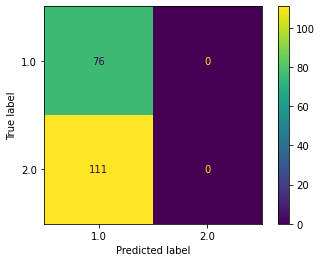

Sensitivity :  1.0
Specificity :  0.0
Precision Score of the classifier is: 0.40641711229946526
Recall Score of the classifier is: 1.0
F-measure of the classifier is: 0.5779467680608364
              precision    recall  f1-score   support

     class 0       0.41      1.00      0.58        76
     class 1       0.00      0.00      0.00       111

    accuracy                           0.41       187
   macro avg       0.20      0.50      0.29       187
weighted avg       0.17      0.41      0.23       187

AUC: 0.50


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(per, X_test, y_test)
plt.show()

#Sensitivity
CM = confusion_matrix(y_test, y_pred)
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )
#specificity
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)
#Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}")
#recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")
#F-measure
from sklearn.metrics import f1_score
print(f"F-measure of the classifier is: {f1_score(y_test,y_pred)}")
#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)
#ROC area under the curve
from sklearn.metrics import roc_auc_score
# Generate class membership probabilities
#y_preb_probs = per.predict_proba(X_test)
#y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

measure the accuracy using 10-fold cross-validation on the training set.

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
cv = KFold(n_splits=10)
#build multiple linear regression model
model = Perceptron(random_state=42)
#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#view mean absolute error
mean(absolute(scores))

0.4931531531531531

Confusion matrix of the 10 fold cross validation:

https://towardsdatascience.com/how-to-plot-a-confusion-matrix-from-a-k-fold-cross-validation-b607317e9874

The core part of the solution is to calculate the actual and predicted classes (i.e. classifications) for the folded data by defining a helper function called cross_val_predict that does the following -

Takes a local copy of the machine learning algorithm (model) to avoid changing the one passed in
Iterates around the 5 cross-validation data folds (given that n_splits=5).
For each of the 5 splits —

a. Extracts the rows from the data for the training features, training target, test features and test target

b. Appends the actual target classifications to actual_classes

c. Fits the machine learning model using the training data extracted from the current fold

d. Uses the fitted model to predict the target classifications for the test data in the current fold

e. Appends the predicted classes for the current fold of test data to predicted_classes

The helper function then returns the full set of actual and predicted classes (classifications) that can be used to plot a confusion matrix.

In [38]:
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import seaborn as sns
from typing import Tuple
from sklearn.metrics import confusion_matrix

In [39]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [40]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

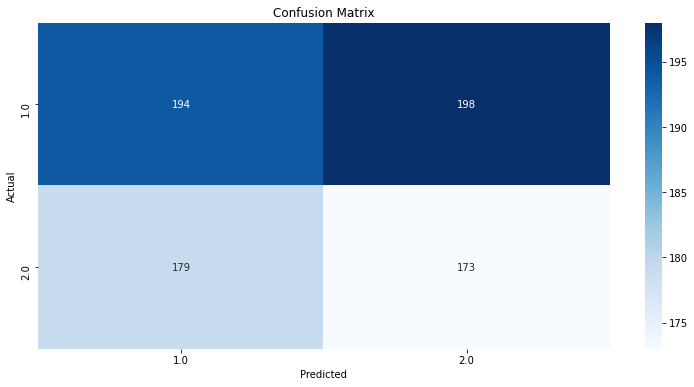

In [43]:
actual_classes, predicted_classes, _ = cross_val_predict(model, cv, X_train.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1.0, 2.0])

AUC of 10 fold cross validation 

https://www.projectpro.io/recipes/check-models-auc-score-using-cross-validation-in-python

In [45]:
mean_score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

In [46]:
mean_score

0.762998472064208

# MLP : 

https://www.programmingempire.com/example-of-multi-layer-perceptron-classifier-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Experiment with various parameters that control the learning. For example: the learning rate, the number and size of layers the
number of iterations, batch size, epochs and momentum, and validation threshold. 

Default :

lass sklearn.neural_network.MLPClassifier(**hidden_layer_sizes=(100,)**, **activation='relu'**, *, solver='adam', alpha=0.0001, **batch_size='auto'**, **learning_rate='constant'**, **learning_rate_init=0.001**, power_t=0.5, **max_iter=200**, shuffle=True, **random_state=None**, tol=0.0001, verbose=False, warm_start=False, **momentum=0.9**, nesterovs_momentum=True, early_stopping=False, **validation_fraction=0.1**, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [52]:
from sklearn.neural_network import MLPClassifier

**Architecture 1 :** 

In [56]:
per1 = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', batch_size='auto', 
                 learning_rate_init=0.001, max_iter=200, momentum=0.9, validation_fraction=0.1,random_state=42)

In [59]:
scores1 = cross_val_score(per1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [63]:
print(f"Accuracy of the classifier is: {mean(absolute(scores1))}")

Accuracy of the classifier is: 0.5886126126126127


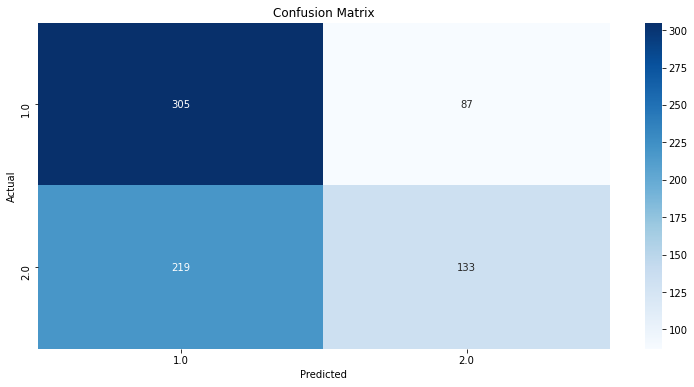

In [61]:
actual_classes, predicted_classes, _ = cross_val_predict(per1, cv, X_train.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1.0, 2.0])

In [62]:
cross_val_score(per1, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

0.9361058735177323

**Architecture 2 :**

In [64]:
per2 =MLPClassifier(hidden_layer_sizes=(12, 13, 14),activation='relu', batch_size=300, 
                 learning_rate_init=0.01, max_iter=300, momentum=0.8, validation_fraction=0.2,random_state=42)

In [65]:
scores2 = cross_val_score(per2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [66]:
print(f"Accuracy of the classifier is: {mean(absolute(scores2))}")

Accuracy of the classifier is: 0.516


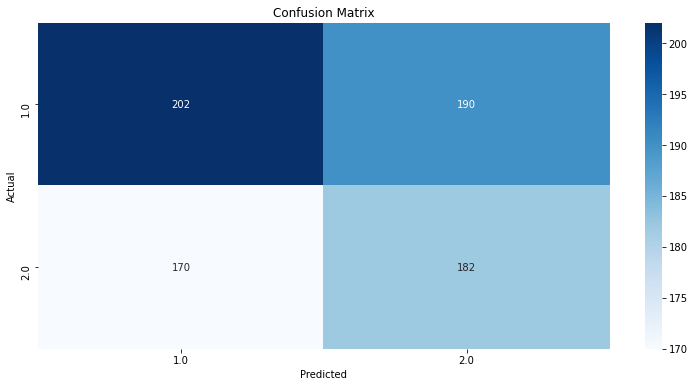

In [67]:
actual_classes, predicted_classes, _ = cross_val_predict(per2, cv, X_train.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1.0, 2.0])

In [68]:
cross_val_score(per2, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

0.8939425918016324

**Architecture 3 :**

In [69]:
per3 = MLPClassifier(hidden_layer_sizes=(100,),activation='logistic', batch_size='auto', 
                 learning_rate_init=0.001, max_iter=200, momentum=0.9, validation_fraction=0.1,random_state=42)

In [70]:
scores3 = cross_val_score(per3, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"Accuracy of the classifier is: {mean(absolute(scores3))}")

Accuracy of the classifier is: 0.5269909909909909


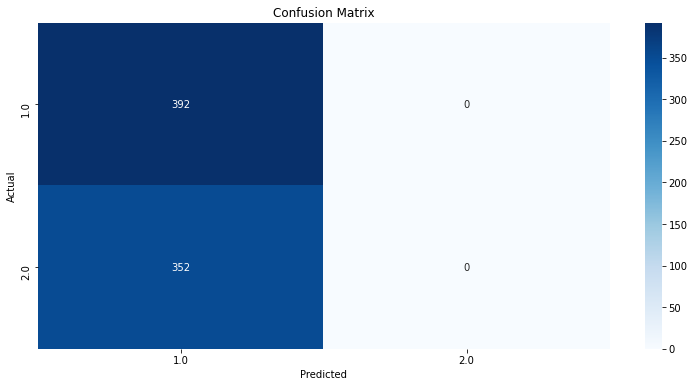

In [71]:
actual_classes, predicted_classes, _ = cross_val_predict(per3, cv, X_train.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1.0, 2.0])

In [72]:
cross_val_score(per3, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

0.6446754049439244

**Architecture 4 :**

In [76]:
per4 =MLPClassifier(hidden_layer_sizes=(12, 13, 14),activation='logistic', batch_size=300, 
                 learning_rate_init=0.01, max_iter=300, momentum=0.8, validation_fraction=0.2,random_state=42)

In [77]:
scores4 = cross_val_score(per4, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"Accuracy of the classifier is: {mean(absolute(scores4))}")

Accuracy of the classifier is: 0.5269909909909909


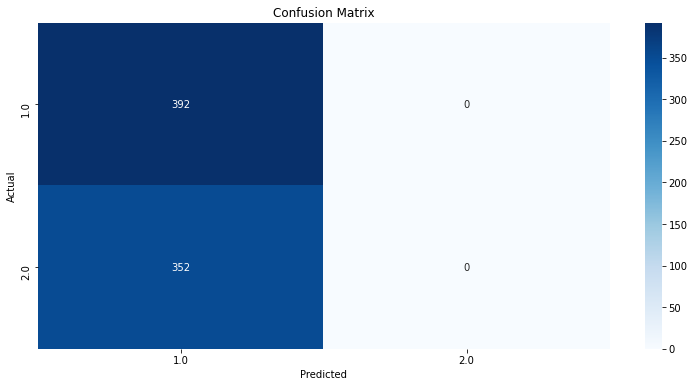

In [78]:
actual_classes, predicted_classes, _ = cross_val_predict(per4, cv, X_train.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1.0, 2.0])

In [79]:
cross_val_score(per4, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

0.5670035598981149

**Architecture 5 :**

In [84]:
per5 =MLPClassifier(hidden_layer_sizes=(31, 33, 34),activation='tanh', batch_size=400, 
                 learning_rate_init=0.1, max_iter=400, momentum=0.7, validation_fraction=0.8,random_state=42)

In [87]:
scores5 = cross_val_score(per5, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"Accuracy of the classifier is: {mean(absolute(scores5))}")

Accuracy of the classifier is: 0.4745945945945945


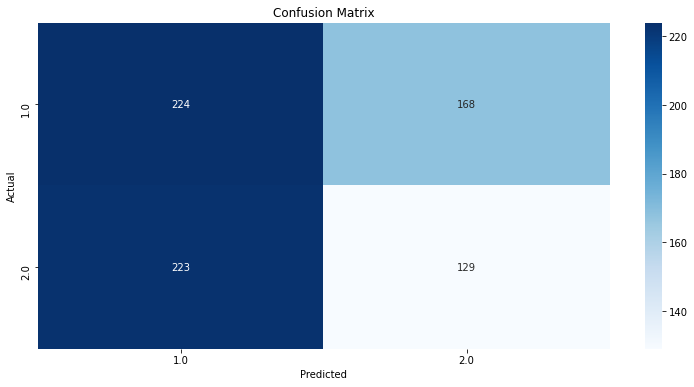

In [88]:
actual_classes, predicted_classes, _ = cross_val_predict(per5, cv, X_train.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1.0, 2.0])

In [89]:
cross_val_score(per5, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

0.479181362381353

**Architecture 6 :**

In [90]:
per6 = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', batch_size=400, 
                 learning_rate_init=0.001, max_iter=400, momentum=0.9, validation_fraction=0.1,random_state=42)

In [91]:
scores6 = cross_val_score(per6, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"Accuracy of the classifier is: {mean(absolute(scores6))}")

Accuracy of the classifier is: 0.5918738738738738


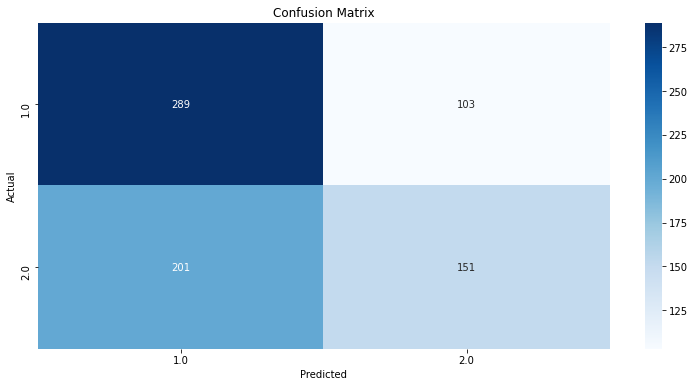

In [92]:
actual_classes, predicted_classes, _ = cross_val_predict(per6, cv, X_train.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1.0, 2.0])

In [93]:
cross_val_score(per6, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

0.9365427121501633

Which architecture is the best performing? How do you tell?

- Architecture 1 : 
- Architecture 2 :
- Architecture 3 :
- Architecture 4 :
- Architecture 5 :
- Architecture 6 :

We eliminated the architectures 3 and 4 as they lack balance between sensitivity and specificity, these classifiers only predict one class for all instances.

Architectures 1 and 6 are pretty close but architecture 6 gives us overall the best results.

**Classifier 1** : Using the best working Architecture, repeat the experiment, this time using training and testing data
sets instead of the cross validation. That is, build the classifier using the training data set, and test the
classifier using the test data set.

In [94]:
per7 = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', batch_size=400, 
                 learning_rate_init=0.001, max_iter=400, momentum=0.9, validation_fraction=0.1,random_state=42)
per7.fit(X_train, y_train)
y_pred7 = per7.predict(X_test)

Note the accuracy. Answer the question: Does the classifier generalize
well to new data? How do you tell? 

In [95]:
print(f"Accuracy of the classifier on the test set is: {accuracy_score(y_test, y_pred7)}")

Accuracy of the classifier on the test set is: 0.7219251336898396


In [99]:
y_pred_tr = per7.predict(X_train)
print(f"Accuracy of the classifier on the training set is: {accuracy_score(y_train, y_pred_tr)}")

Accuracy of the classifier on the training set is: 0.6276881720430108


In [98]:
# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred7))
# plot_confusion_matrix function is used to visualize the confusion matrix
#plot_confusion_matrix(per7, X_test, y_test)
#plt.show()
#Sensitivity
CM = confusion_matrix(y_test, y_pred7)
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )
#specificity
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)
#Precision
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred7)}")
#recall
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred7)}")
#F-measure
print(f"F-measure of the classifier is: {f1_score(y_test,y_pred7)}")
#classification report
target_names = ['class 0', 'class 1']
report = classification_report(y_test, y_pred7, target_names=target_names)
print(report)
#ROC area under the curve
# Generate class membership probabilities
#y_preb_probs = per.predict_proba(X_test)
#y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test, y_pred7)
print('AUC: %.2f' % auc)

[[ 24  52]
 [  0 111]]
Sensitivity :  0.3157894736842105
Specificity :  1.0
Precision Score of the classifier is: 1.0
Recall Score of the classifier is: 0.3157894736842105
F-measure of the classifier is: 0.4799999999999999
              precision    recall  f1-score   support

     class 0       1.00      0.32      0.48        76
     class 1       0.68      1.00      0.81       111

    accuracy                           0.72       187
   macro avg       0.84      0.66      0.65       187
weighted avg       0.81      0.72      0.68       187

AUC: 0.66


**Classifier 2** : Make new training and testing sets, by moving 30% of the instances from the original training set into
the testing set.

In [100]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=24)

In [101]:
per8 = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', batch_size=400, 
                 learning_rate_init=0.001, max_iter=400, momentum=0.9, validation_fraction=0.1,random_state=42)
per8.fit(X_train2, y_train2)
y_pred8 = per8.predict(X_test2)

Note the accuracies on the training and the testing sets.

In [102]:
print(f"Accuracy of the classifier on the test set is: {accuracy_score(y_test2, y_pred8)}")

Accuracy of the classifier on the test set is: 0.4392857142857143


In [103]:
y_pred_tr2 = per8.predict(X_train2)
print(f"Accuracy of the classifier on the training set is: {accuracy_score(y_train2, y_pred_tr2)}")

Accuracy of the classifier on the training set is: 0.5299539170506913


In [106]:
# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test2, y_pred8))
# plot_confusion_matrix function is used to visualize the confusion matrix
#plot_confusion_matrix(per8, X_test2, y_test2)
#plt.show()
#Sensitivity
CM = confusion_matrix(y_test2, y_pred8)
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )
#specificity
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)
#Precision
print(f"Precision Score of the classifier is: {precision_score(y_test2, y_pred8)}")
#recall
print(f"Recall Score of the classifier is: {recall_score(y_test2, y_pred8)}")
#F-measure
print(f"F-measure of the classifier is: {f1_score(y_test2,y_pred8)}")
#classification report
target_names = ['class 0', 'class 1']
report = classification_report(y_test2, y_pred8, target_names=target_names)
print(report)
#ROC area under the curve
# Generate class membership probabilities
#y_preb_probs = per.predict_proba(X_test)
#y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test2, y_pred8)
print('AUC: %.2f' % auc)

[[123   0]
 [157   0]]
Sensitivity :  1.0
Specificity :  0.0
Precision Score of the classifier is: 0.4392857142857143
Recall Score of the classifier is: 1.0
F-measure of the classifier is: 0.6104218362282878
              precision    recall  f1-score   support

     class 0       0.44      1.00      0.61       123
     class 1       0.00      0.00      0.00       157

    accuracy                           0.44       280
   macro avg       0.22      0.50      0.31       280
weighted avg       0.19      0.44      0.27       280

AUC: 0.50


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Classifier 3** : Make new training and testing sets, by moving 60% of the instances from the original training set into the testing set. 

In [107]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.6, random_state=24)

In [108]:
per9 = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', batch_size=400, 
                 learning_rate_init=0.001, max_iter=400, momentum=0.9, validation_fraction=0.1,random_state=42)
per9.fit(X_train3, y_train3)
y_pred9 = per9.predict(X_test3)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Note the accuracies on the training and the testing sets.

In [109]:
print(f"Accuracy of the classifier on the test set is: {accuracy_score(y_test3, y_pred9)}")

Accuracy of the classifier on the test set is: 0.5205724508050089


In [111]:
y_pred_tr3 = per9.predict(X_train3)
print(f"Accuracy of the classifier on the training set is: {accuracy_score(y_train3, y_pred_tr3)}")

Accuracy of the classifier on the training set is: 0.46236559139784944


In [112]:
# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test3, y_pred9))
# plot_confusion_matrix function is used to visualize the confusion matrix
#plot_confusion_matrix(per8, X_test2, y_test2)
#plt.show()
#Sensitivity
CM = confusion_matrix(y_test3, y_pred9)
sensitivity = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity )
#specificity
specificity = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity)
#Precision
print(f"Precision Score of the classifier is: {precision_score(y_test3, y_pred9)}")
#recall
print(f"Recall Score of the classifier is: {recall_score(y_test3, y_pred9)}")
#F-measure
print(f"F-measure of the classifier is: {f1_score(y_test3,y_pred9)}")
#classification report
target_names = ['class 0', 'class 1']
report = classification_report(y_test3, y_pred9, target_names=target_names)
print(report)
#ROC area under the curve
# Generate class membership probabilities
#y_preb_probs = per.predict_proba(X_test)
#y_preb_probs = y_preb_probs[:, 1]
auc = roc_auc_score(y_test3, y_pred9)
print('AUC: %.2f' % auc)

[[  0 268]
 [  0 291]]
Sensitivity :  0.0
Specificity :  1.0
Precision Score of the classifier is: 0.0
Recall Score of the classifier is: 0.0
F-measure of the classifier is: 0.0
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       268
     class 1       0.52      1.00      0.68       291

    accuracy                           0.52       559
   macro avg       0.26      0.50      0.34       559
weighted avg       0.27      0.52      0.36       559

AUC: 0.50


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:13

Finally, analyse Classifier 1, Classifier 2 and Classifier 3 from the point of view of the problem of classifier over-fitting. Do you notice the effects of over-fitting? How? Note your conclusions in the Jupyter notebook.

Note: to make conclusions about overfitting, you must compare accuracies of your three classifiers on
training and on testing data sets.

Make conclusions about your experiments with tuning parameters of the multilayer perceptron. Make
conclusions: what was the influence of various parameters on the classifier’s performance? Hypothesise
why.

Make conclusions about the
problem of overfitting of neural networks. What are the ways to stop neural networks from over-fitting?
Try a few on your data set and see if it works?

https://www.educba.com/overfitting-neural-network/

- **Data Augmentation** : Given limited datasets, overfitting can be prevented by Data augmentation. It is a process of creating more versions of the existing dataset by adding pan, zoom, vertical flip, horizontal flip, padding, rotating, etc. Using batch normalization with backpropagation – Scale the data by normalizing -> Improves the learning rate & reduces the dependencies on data.
- **Batch Normalization** : Normalization is the process of introducing mean and standard deviation of data in order to enable better generalization. Batch normalization adds a layer on top of the regular input layer to apply normalization to every node of the neural network. Batch normalization has additional benefits like improved gradient flow, higher learning rates, etc. Also, the batch normalization can be ignored during backpropagation, making it faster to train the model.
- **Dropouts** : It is a process of randomly dropping the activations from the last layer of every level, before passing the activation function to the next layer. 
- **Weight Decay** : Although weight decay is similar to dropouts, they are totally different in implementation. The primary constructs of neural networks are weights and biases between different neurons. Weight decay engages selective weights that reduce while moving towards the output layers. As the weight decays, overfitting reduces enabling generalization.
- **Early stopping** : prevents overfitting by preventing the model training for the entire set whenever validation loss rises
- **L1/L2 Regularization** : L1 is a Lasso Regression, whereas L2 is Ridge regression. These techniques introduce a penalty system within the model to help keep features in check.
- **Recursive Feature Elimination** : We develop a system to calculate the importance of every feature after training the dataset, and the least important feature gets eliminated from passing on to the next layer. One can assume recursive feature elimination as a sophisticated dropout method for large models.
- **Test Time Augmentation** : Test time augmentation is like data augmentation but happens at the end of the training. The mean of final activations obtained by training the model with different versions of the training data is the output of the model. Although TTA provides just 1 or 2 per cent improvement inaccuracy 


First I'll use GridSearch to find the best parameters for the MLP since the best architecture didn't really have high scores of accuracy that would reflect overfitting

In [117]:
params = {'activation':['identity', 'logistic', 'tanh', 'relu'],'solver':['lbfgs', 'sgd', 'adam'],'max_iter':[200,300,400,500,1000]}

In [115]:
from sklearn.model_selection import GridSearchCV

In [118]:
grid_search_cv = GridSearchCV(MLPClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numbe

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'max_iter': [200, 300, 400, 500, 1000],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=1)

In [119]:
grid_search_cv.best_estimator_

MLPClassifier(solver='lbfgs')

In [120]:
per10 = MLPClassifier(solver='lbfgs')
per10.fit(X_train, y_train)
y_pred10 = per10.predict(X_test)
print(f"Accuracy of the classifier on the test set is: {accuracy_score(y_test, y_pred10)}")

Accuracy of the classifier on the test set is: 0.8716577540106952


In [121]:
y_pred_tr4 = per10.predict(X_train)
print(f"Accuracy of the classifier on the training set is: {accuracy_score(y_train, y_pred_tr4)}")

Accuracy of the classifier on the training set is: 0.8548387096774194


While I wouldn't really consider the model as overfitted, we'll proceed with the ways of mitigating the problem for practice.
- Can't use the parameter early stopping here since our solver isn't sgd or adam
- we can use alpha to raise the strength of the L2 regularization 
- We can also try Recursive feature elimination (year most likely is an attribute we can drop)

First we'll see the effects of the alpha parameter :

In [160]:
per11 = MLPClassifier(solver='lbfgs',alpha = 0.001)
per11.fit(X_train, y_train)
y_pred11 = per11.predict(X_test)
print(f"Accuracy of the classifier on the test set is: {accuracy_score(y_test, y_pred11)}")

Accuracy of the classifier on the test set is: 0.8502673796791443


In [161]:
per12 = MLPClassifier(solver='lbfgs',alpha = 0.01)
per12.fit(X_train, y_train)
y_pred12 = per12.predict(X_test)
print(f"Accuracy of the classifier on the test set is: {accuracy_score(y_test, y_pred12)}")

Accuracy of the classifier on the test set is: 0.40641711229946526


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


https://towardsdatascience.com/powerful-feature-selection-with-recursive-feature-elimination-rfe-of-sklearn-23efb2cdb54e#:~:text=One%20such%20technique%20offered%20by%20Sklearn%20is%20Recursive,due%20to%20its%20flexibility%20and%20ease%20of%20use.

Sklearn Recursive Feature Elimination Class :


In [166]:
from sklearn.feature_selection import RFE
# Init the transformer
rfe = RFE(MLPClassifier(solver='lbfgs'), n_features_to_select=5)
rfe.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


ValueError: when `importance_getter=='auto'`, the underlying estimator MLPClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

https://datascience.stackexchange.com/questions/44700/how-do-i-get-the-feature-importace-for-a-mlpclassifier#:~:text=Although%20not%20all%20scikit-learn%20integration%20is%20present%20when,saves%20you%20from%20trying%20to%20implement%20it%20yourself.

https://stackoverflow.com/questions/41082835/sklearn-mlp-feature-selection

https://scikit-learn.org/stable/modules/permutation_importance.html

In [169]:
from sklearn.inspection import permutation_importance

In [171]:
r = permutation_importance(per11, X_train, y_train, n_repeats=30)

In [174]:
per11.score(X_train, y_train)

0.8239247311827957

In [173]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

GDP per Capita0.150 +/- 0.013
Social support0.027 +/- 0.010


https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

In [175]:
import tensorflow as tf
from tensorflow import keras

german street sign recognition

Fashion MNIST

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/#:~:text=The%20learning%20rate%20controls%20how%20quickly%20the%20model,in%20rapid%20changes%20and%20require%20fewer%20training%20epochs.

https://stats.stackexchange.com/questions/338255/what-is-effect-of-increasing-number-of-hidden-layers-in-a-feed-forward-nn#:~:text=2%29%20Increasing%20the%20number%20of%20hidden%20layers%20much,be%20able%20to%20generalize%20to%20new%20unseen%20data.

https://www.aitude.com/comparison-of-sigmoid-tanh-and-relu-activation-functions/https://www.aitude.com/comparison-of-sigmoid-tanh-and-relu-activation-functions/